In [1]:
# HIDDEN
from datascience import *
import numpy as np
path_data = '../../../data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
top = Table.read_table('./top_movies.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [3]:
millions = top.select(0).with_column('Adjusted Gross', np.round(top.column(3)/1e6,2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


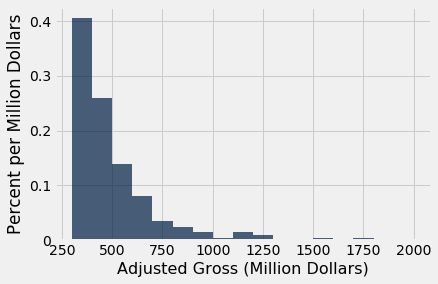

In [5]:
millions.hist('Adjusted Gross', bins=np.arange(300, 2001, 100), unit="Million Dollars")

In [6]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

bin,Adjusted Gross count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


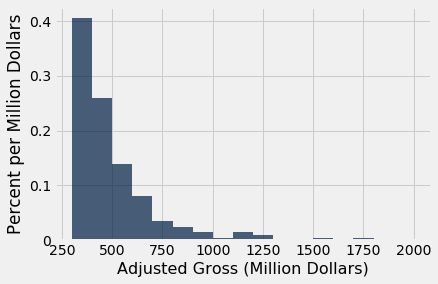

In [7]:
bin_counts.hist('Adjusted Gross count', bin_column='bin', unit='Million Dollars')

In [11]:
counts = bin_counts.relabeled('Adjusted Gross count', 'Count')
percents = counts.with_column(
    'Percent', (counts.column('Count')/200)*100
    )
heights = percents.with_column(
    'Height', percents.column('Percent')/100
    )
heights

bin,Count,Percent,Height
300,81,40.5,0.405
400,52,26,0.26
500,28,14,0.14
600,16,8,0.08
700,7,3.5,0.035
800,5,2.5,0.025
900,3,1.5,0.015
1000,1,0.5,0.005
1100,3,1.5,0.015
1200,2,1,0.01


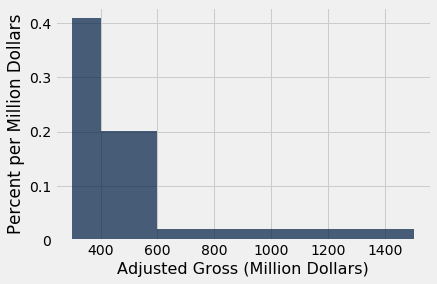

In [12]:
uneven = make_array(300, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")


In [13]:
millions.bin('Adjusted Gross', bins=uneven)

bin,Adjusted Gross count
300,81
400,80
600,37
1500,0


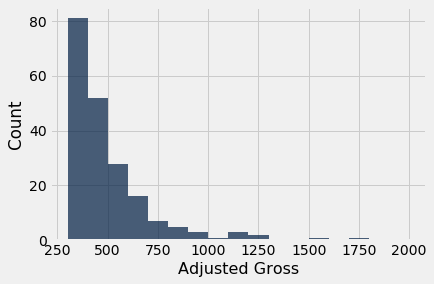

In [14]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), normed=False)

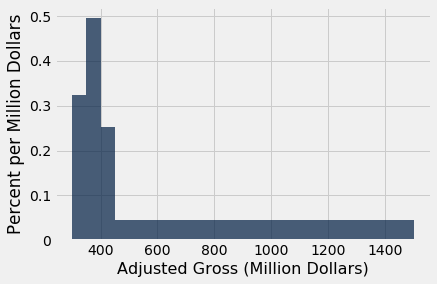

In [15]:
uneven_again = make_array(300, 350, 400, 450, 1500)
millions.hist('Adjusted Gross', bins=uneven_again, unit='Million Dollars')

In [16]:
millions.bin('Adjusted Gross', bins=uneven_again)

bin,Adjusted Gross count
300,32
350,49
400,25
450,92
1500,0
